### MNIST dataset Attempt Uno

Imports

In [78]:
import tensorflow as tf
import tensorflow_datasets as tfds
from matplotlib import pyplot as plt
from tensorflow import keras
from keras.regularizers import l1, l2, l1_l2
import numpy as np

Import Dataset

In [6]:
[mnist_train, mnist_test] = tfds.load("mnist", split=["train[:80%]", "test[80%:]"], as_supervised=True)

Define Plotting Functions

In [35]:
def plot_img(img):
    plt.imshow(img)
    plt.show()

Format Data

In [40]:
train_normal = mnist_train.map(lambda x, y: (tf.reshape(x, [28, 28]) / 255, y))
test_normal = mnist_test.map(lambda x, y: (tf.reshape(x, [28, 28]) / 255, y))

View Data

In [34]:
train_normal

<MapDataset shapes: ((28, 28, 1), ()), types: (tf.float32, tf.int64)>

(28, 28)


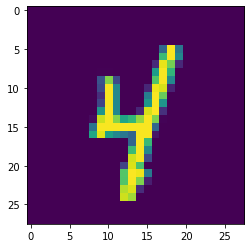

tf.Tensor(4, shape=(), dtype=int64)


In [41]:
for i in train_normal:
    print(i[0].shape)
    plot_img(i[0])
    print(i[1])
    c = input("continue: ")
    if c.lower() != 'y':
        break

Train Model

Epoch 1/30
160/160 [==============================] - 1s 2ms/step - loss: 0.3523 - sparse_categorical_accuracy: 0.8897
Epoch 2/30
160/160 [==============================] - 1s 2ms/step - loss: 0.1698 - sparse_categorical_accuracy: 0.9495

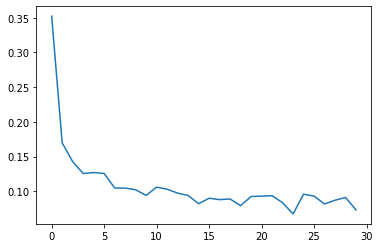

In [134]:
model = keras.models.Sequential(layers=[
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(units=54, activation="relu"),
    keras.layers.Dense(units=24, activation="relu"),
    keras.layers.Dense(units=10, activation="sigmoid")
])

learning_rate = 0.03
epochs=30
batch_size=300

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=[tf.keras.metrics.SparseCategoricalAccuracy()])

train_batched = train_normal.batch(batch_size=batch_size).shuffle(1000)
history = model.fit(train_batched, epochs=epochs)

loss = history.history["loss"]
plt.plot(np.arange(0, len(loss)), loss)

In [135]:
print(model.evaluate(test_normal.batch(batch_size=batch_size).shuffle(100)))


7/7 [==============================] - 0s 1ms/step - loss: 0.1734 - sparse_categorical_accuracy: 0.9685
[0.17336688935756683, 0.968500018119812]
